### Lab 2 - Data preparation

In [724]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pickle
from matplotlib import colors
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency
from statsmodels.tools.eval_measures import aic, bic
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
file_path = Path('data/houses.csv')

In [9]:
houses = pd.read_csv(file_path)

In [11]:
houses.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,1,526301100,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,2,526350040,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,3,526351010,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,4,526353030,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,5,527105010,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [13]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order               2930 non-null   int64  
 1   PID                 2930 non-null   int64  
 2   MS_SubClass         2930 non-null   object 
 3   MS_Zoning           2930 non-null   object 
 4   Lot_Frontage        2930 non-null   int64  
 5   Lot_Area            2930 non-null   int64  
 6   Street              2930 non-null   object 
 7   Alley               2930 non-null   object 
 8   Lot_Shape           2930 non-null   object 
 9   Land_Contour        2930 non-null   object 
 10  Utilities           2930 non-null   object 
 11  Lot_Config          2930 non-null   object 
 12  Land_Slope          2930 non-null   object 
 13  Neighborhood        2930 non-null   object 
 14  Condition_1         2930 non-null   object 
 15  Condition_2         2930 non-null   object 
 16  Bldg_T

## missing value detection

In [15]:
columns_with_missings = houses.columns[houses.isnull().any()]

In [17]:
houses[columns_with_missings].isnull().sum()

Mas_Vnr_Type    1775
Electrical         1
Misc_Feature    2824
dtype: int64

In [36]:
houses.isna().sum().sum()

4600

In [46]:
# frequency tables for these columns
print('Frequency counts for Mas_Vnr_Type: \n')
print(houses['Mas_Vnr_Type'].value_counts(dropna=False))

Frequency counts for Mas_Vnr_Type: 

Mas_Vnr_Type
None       1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64


In [44]:
print('Frequency counts for Misc_Feature: \n')
print(houses['Misc_Feature'].value_counts(dropna=False))

Frequency counts for Misc_Feature: 

Misc_Feature
None    2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: count, dtype: int64


In [42]:
print('Frequency counts for Electrical: \n')
print(houses['Electrical'].value_counts(dropna=False))

Frequency counts for Electrical: 

Electrical
SBrkr    2683
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64


---
=> according to data description the missing values in Mas_Vnr_Type and in Misc_Feature should be the value 'None'. In case of Electrical column we can replace the missing value with the most frequent level 'SBrkr'

=> Complete Handling Missing Values before train/test split as they do not depend on the specific data distribution

---

In [48]:
# houses['Mas_Vnr_Type'] = houses['Mas_Vnr_Type'].fillna('None')
# houses['Misc_Feature'] = houses['Misc_Feature'].fillna('None')
# houses['Electrical'] = houses['Electrical'].fillna('SBrkr')

houses.Mas_Vnr_Type.fillna('None', inplace=True)
houses.Misc_Feature.fillna('None', inplace=True)
houses.Electrical.fillna('SBrkr', inplace=True)

In [62]:
# frequency tables again to check the results of imputation
print(houses['Mas_Vnr_Type'].value_counts(dropna = False))
print()
print(houses['Electrical'].value_counts(dropna = False))
print()
print(houses['Misc_Feature'].value_counts(dropna = False))

Mas_Vnr_Type
None       1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64

Electrical
SBrkr    2683
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

Misc_Feature
None    2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: count, dtype: int64


In [76]:
# check for missing values after imputation
columns_with_missings = houses.columns[houses.isnull().any()]
houses[columns_with_missings].isnull().sum()

Series([], dtype: float64)

## Small Counts (Distribution of Nominal Variables)

=> Distributuons of nominal variables \
Check the frequencies of individual levels of all nominal variables.\
Extremely small counts of single levels are problematic as they might be very rare cases which a model will not be able to learn how they influence the sale price. Therefore we will place all the levels which have no more than 25 observations with the label 'other'.

In [83]:
nominal_variables = ['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Lot_Config',
                     'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
                     'House_Style', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
                     'Exterior_2nd', 'Mas_Vnr_Type', 'Foundation', 'Misc_Feature',
                     'Heating', 'Central_Air', 'Garage_Type', 'Misc_Feature',
                     'Sale_Type', 'Sale_Condition', 'Land_Contour']

In [93]:
for var in nominal_variables:
    value_counts = houses[var].value_counts()
    print('\n')
    print(houses[var].value_counts(dropna=False))



MS_SubClass
One_Story_1946_and_Newer_All_Styles          1079
Two_Story_1946_and_Newer                      575
One_and_Half_Story_Finished_All_Ages          287
One_Story_PUD_1946_and_Newer                  192
One_Story_1945_and_Older                      139
Two_Story_PUD_1946_and_Newer                  129
Two_Story_1945_and_Older                      128
Split_or_Multilevel                           118
Duplex_All_Styles_and_Ages                    109
Two_Family_conversion_All_Styles_and_Ages      61
Split_Foyer                                    48
Two_and_Half_Story_All_Ages                    23
One_and_Half_Story_Unfinished_All_Ages         18
PUD_Multilevel_Split_Level_Foyer               17
One_Story_with_Finished_Attic_All_Ages          6
One_and_Half_Story_PUD_All_Ages                 1
Name: count, dtype: int64


MS_Zoning
Residential_Low_Density         2273
Residential_Medium_Density       462
Floating_Village_Residential     139
Residential_High_Density          27


=> Replace all the levels which have no more than 25 observations (ca. 1% of the sample size) with the label `other`. \
IMPORTANT! Remember that for a nominal variable we can combine any levels together, while for an ORDINAL feature ONLY neighboring levels can be combined! \
Based on the information about the dataset we can list all nominal variables.

In [97]:
for var in nominal_variables:
    value_counts = houses[var].value_counts()
    levels_to_replace = value_counts[value_counts <= 25].index
    houses[var] = houses[var].replace(levels_to_replace, "Other")

In [105]:
# check the frequencies of nominal variables again
for var in nominal_variables:
    value_counts = houses[var].value_counts()
    print('\n')
    print(houses[var].value_counts(dropna=False))
# looks like the problem with small counts has been solved



MS_SubClass
One_Story_1946_and_Newer_All_Styles          1079
Two_Story_1946_and_Newer                      575
One_and_Half_Story_Finished_All_Ages          287
One_Story_PUD_1946_and_Newer                  192
One_Story_1945_and_Older                      139
Two_Story_PUD_1946_and_Newer                  129
Two_Story_1945_and_Older                      128
Split_or_Multilevel                           118
Duplex_All_Styles_and_Ages                    109
Other                                          65
Two_Family_conversion_All_Styles_and_Ages      61
Split_Foyer                                    48
Name: count, dtype: int64


MS_Zoning
Residential_Low_Density         2273
Residential_Medium_Density       462
Floating_Village_Residential     139
Other                             29
Residential_High_Density          27
Name: count, dtype: int64


Street
Pave     2918
Other      12
Name: count, dtype: int64


Alley
No_Alley_Access    2732
Gravel              120
Paved             

## Near-zero variance

What can be still problematic however is the strong concentration of variable values in one level (issue called as `near-zero variance`) - such variables have little predictive power and can be omitted.

To identify variables that have a small variance, use a measure based on the ratio of the most frequent and second most frequent values (`frequency ratio`) \
For well diversified variables it will take a value close to 1, and a very high value for unbalanced data. \
Another useful measure is the percent of unique values: `100 * (number of unique values) / (number of observations)`

It is close to zero for data that is not very diversified.\
If the `frequency ratio` is greater than some threshold, and the "percent of unique values" is less than a certain limit value, we can assume that the variable has a variance close to 0 and can be potentially omitted.

=> define a function which will check it with the threshold 95/5 for the `frequency ratio` and 10 for the `percent of unique values`.

In [128]:
def near_zero_variance(df, freq_cut = 95/5, unique_cut = 10):
    results = []
    for col in df.columns:
        counts = df[col].value_counts()
        if len(counts) > 1:
            freq_ratio = counts.iloc[0] / counts.iloc[1]
        else:
            freq_ratio = float('inf') # only one unique value

        # calculate unique_ratio
        unique_ratio = len(counts) / len(df)
        # determine binary indicators
        high_freq_ratio = int(freq_ratio > freq_cut)
        low_unique_ratio = int(unique_ratio < unique_cut)
        # append results
        results.append({
            'variable': col,
            'freq_ratio': freq_ratio,
            'unique_ratio': unique_ratio,
            'high_freq_ratio': high_freq_ratio,
            'low_unique_ratio': low_unique_ratio
        })
        # convert results to a DataFrame
        results_df = pd.DataFrame(results)
        # sort by 'high_freq_ratio' (descending) and 'low_unique_ratio' (ascending)
        results_df = results_df.sort_values(by=['freq_ratio', 'unique_ratio'], 
                                    ascending=[False, True])
        return results_df

In [147]:
# apply it to the dataset
houses_nzv = near_zero_variance(houses, freq_cut = 97/3, unique_cut = 10)
houses_nzv[(houses_nzv['low_unique_ratio']==1) & (houses_nzv['high_freq_ratio']==1)]

,variable,freq_ratio,unique_ratio,high_freq_ratio,low_unique_ratio


In [149]:
# lets remove problematic variables from the dataset
variables_nzv = houses_nzv[(houses_nzv['low_unique_ratio'] == 1) &
                            (houses_nzv['high_freq_ratio'] == 1)]['variable']
print(variables_nzv)
houses.drop(variables_nzv, axis = 1, inplace = True)

Series([], Name: variable, dtype: object)


In [153]:
# drop Latitude and Longitude
houses.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

## Train / Test split

In [156]:
# split the data into train and test samples based on a year
houses_train = houses[houses['Year_Sold'] <= 2008]
houses_test = houses[houses['Year_Sold'] > 2008]

In [164]:
# houses_train.tail()

In [166]:
# houses_test.head()

In [168]:
houses_train['Year_Sold'].value_counts()

Year_Sold
2007    694
2006    625
2008    622
Name: count, dtype: int64

In [170]:
houses_test['Year_Sold'].value_counts()

Year_Sold
2009    648
2010    341
Name: count, dtype: int64

## Distribution of the `dependent` variable

Distribution (histogram) of the dependent variable `Sale_Price`

<Axes: xlabel='Sale_Price', ylabel='Count'>

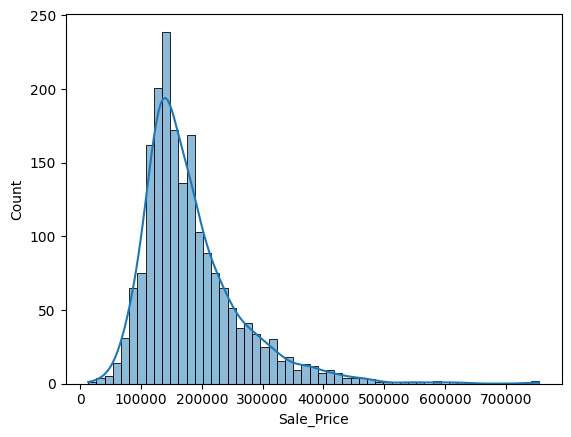

In [180]:
# original distribution before log transformation
sns.histplot(houses_train.Sale_Price, kde=True)
# clearly right-skewed

<Axes: xlabel='Sale_Price', ylabel='Count'>

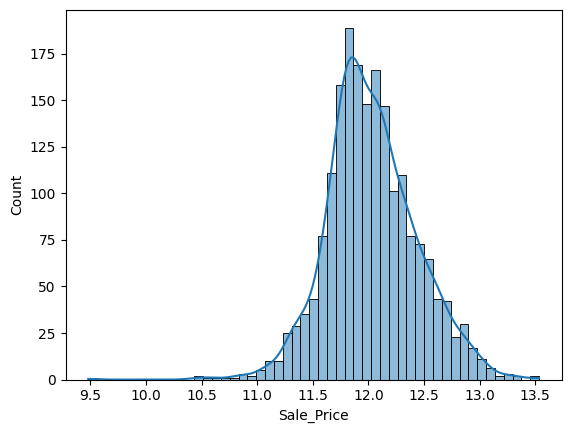

In [184]:
# log transformation, log(x+1) in case of zeros
Sale_Price_Log = np.log(houses_train.Sale_Price + 1)
sns.histplot(Sale_Price_Log, kde=True)
# much more "normal-like" better than previous one for modelling

## Levels of numerical variables

=> check how many unique values does each numeric variable have (qualitative variables can also be stored as numeric - ex: as 0/1). \
=> Print frequency tables for those that have only 3-5 levels.

In [200]:
# houses_train.dtypes

In [198]:
numeric_variables = houses_train.select_dtypes(include=[np.number]).columns

In [210]:
for col in numeric_variables:
    unique_vals = houses_train[col].unique()
    n_unique = len(unique_vals)
    print(f'Column {col} has {n_unique} unique values.')

    # Print frequency tables for those that have only 3-5 levels.
    if n_unique <= 5:
        print(f'Frequency table for {col}:')
        print(houses_train[col].value_counts(dropna = False), "\n")

Column Order has 1941 unique values.
Column PID has 1941 unique values.
Column Lot_Frontage has 119 unique values.
Column Lot_Area has 1413 unique values.
Column Year_Built has 110 unique values.
Column Year_Remod_Add has 60 unique values.
Column Mas_Vnr_Area has 368 unique values.
Column BsmtFin_SF_1 has 8 unique values.
Column BsmtFin_SF_2 has 194 unique values.
Column Bsmt_Unf_SF has 938 unique values.
Column Total_Bsmt_SF has 870 unique values.
Column First_Flr_SF has 901 unique values.
Column Second_Flr_SF has 508 unique values.
Column Low_Qual_Fin_SF has 23 unique values.
Column Gr_Liv_Area has 1045 unique values.
Column Bsmt_Full_Bath has 3 unique values.
Frequency table for Bsmt_Full_Bath:
Bsmt_Full_Bath
0    1158
1     761
2      22
Name: count, dtype: int64 

Column Bsmt_Half_Bath has 3 unique values.
Frequency table for Bsmt_Half_Bath:
Bsmt_Half_Bath
0    1819
1     118
2       4
Name: count, dtype: int64 

Column Full_Bath has 4 unique values.
Frequency table for Full_Bath:

`Bsmt_Full_Bath`, `Bsmt_Half_Bath`, `Full_Bath`, `Half_Bath`, `Kitchen_AbvGr`, `Fireplaces`, `Garage_Cars` are in fact counts with just few levels.

Lets keep them as numeric variables not to increase the number of data dimensions. Alternatively we may consider **combining some levels** (e.g. into 0, 1 vs rest) and apply one-hot encoding.


`Year_Sold` cannot be one-hot-encoded as its values are different in train and test samples - we keep it also as a numeric variable

## Levels of ordinal variables

=> check how many unique values does each ORDINAL variable have.\
=> print frequency tables for them and think how it may influence the data preparation for modelling.

In [216]:
# List of ordinal variables based on the dataset description
# (remember that Utilities, Pool_QC and Functional columns were already removed)

In [222]:
# always check the dataset description to identify ordinal or categorical variables, etc
ordinal_variables = [
    'Lot_Shape', 'Land_Slope', 'Exter_Qual', 'Exter_Cond', 'Bsmt_Qual', 'Bsmt_Cond',
    'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating_QC', 'Kitchen_Qual',
    'Fireplace_Qu', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond', 'Paved_Drive',
    'Fence', 'Overall_Qual', 'Overall_Cond'
]

for col in ordinal_variables:
    unique_vals = houses_train[col].unique()
    n_unique = len(unique_vals)
    print(f"Column '{col}' has {n_unique} unique values.")
    print(f"Frequency table for '{col}':")
    print(houses_train[col].value_counts(dropna = False), "\n")

Column 'Lot_Shape' has 4 unique values.
Frequency table for 'Lot_Shape':
Lot_Shape
Regular                 1213
Slightly_Irregular       661
Moderately_Irregular      55
Irregular                 12
Name: count, dtype: int64 

Column 'Land_Slope' has 3 unique values.
Frequency table for 'Land_Slope':
Land_Slope
Gtl    1850
Mod      81
Sev      10
Name: count, dtype: int64 

Column 'Exter_Qual' has 4 unique values.
Frequency table for 'Exter_Qual':
Exter_Qual
Typical      1201
Good          658
Excellent      65
Fair           17
Name: count, dtype: int64 

Column 'Exter_Cond' has 5 unique values.
Frequency table for 'Exter_Cond':
Exter_Cond
Typical      1704
Good          187
Fair           41
Excellent       8
Poor            1
Name: count, dtype: int64 

Column 'Bsmt_Qual' has 6 unique values.
Frequency table for 'Bsmt_Qual':
Bsmt_Qual
Typical        847
Good           817
Excellent      168
Fair            57
No_Basement     50
Poor             2
Name: count, dtype: int64 

Column '

---
## Encoding Categorical variables

Most of machine learning algorithms like Linear Regression, Neural Networks, SVMs, KNN, etc are not designed to process text-based categorical data directly. So it is crucial to transform categorical data into a numerical form, a process known as `data encoding`.

Some tree-based ML algorithms like Decision Trees and Random Forests can handle categorical data natively, circumventing the need for encoding. However, for most other algorithms, encoding is a vital preprocessing step.

---

## Encoding Ordinal variables

`Ordinal encoding` is appropriate when the categories have a natural ordering or relationship with each other, such as in the case of ordinal variables like "small", "medium", and "large". In these cases, the integer values assigned to the categories should reflect the ordering of the categories.

In [247]:
ordinal_variables_to_transform = ['Lot_Shape', 'Land_Slope', 'Overall_Qual', 'Overall_Cond',
                                  'Exter_Qual', 'Exter_Cond', 'Heating_QC', 'Kitchen_Qual',
                                  'Bsmt_Qual', 'Bsmt_Cond', 'Fireplace_Qu', 'Garage_Qual',
                                  'Garage_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2',
                                  'Electrical', 'Garage_Finish', 'Paved_Drive', 'Fence']

# ------------------------------------------------------------------------------
# For each of them, define a CORRECT order (based on the data description file)
# ------------------------------------------------------------------------------

Lot_Shape_order = ['Regular','Slightly_Irregular','Moderately_Irregular','Irregular']
Land_Slope_order = ['Gtl', 'Mod', 'Sev']

# for two variables: Overall_Qual and Overall_Comd
Overall_Qual_Cond_order =  ['Very_Excellent', 'Excellent', 'Very_Good', 'Good', 
            'Above_Average', 'Average', 'Below_Average', 'Fair','Poor', 'Very_Poor']

# for Exter_Qual, Exter_Cond, Heating_QC, Kitchen_Qual
Qual_Cond_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor']
Bsmt_Qual_Cond_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor', 'No_Basement']
Fireplace_Qu_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor', 'No_Fireplace']
Garage_Qual_Cond_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor', 'No_Garage']
Bsmt_Exposure_order = ['Gd', 'Av', 'Mn', 'No', 'No_Basement']
BsmtFin_Type_1_2_order = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'No_Basement']
Electrical_order = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']
Garage_Finish_order = ['Fin', 'RFn', 'Unf', 'No_Garage']
Paved_Drive_order = ['Paved', 'Partial_Pavement', 'Dirt_Gravel' ]
Fence_order = ['Good_Privacy', 'Minimum_Privacy', 'Good_Wood', 'Minimum_Wood_Wire', 'No_Fence']

Then initialize OrdinalEncoder providing a list of categories for each of the variables which will be transformed. If the argument categories= is an array, it has to be of shape (n_features, ). Put the list in the same order as in `ordinal_variables_to_transform`.

In [249]:
# put the list in the same order as you wrote arguments in "ordinal_variables_to_transform"
encoder_ord = OrdinalEncoder(categories = [Lot_Shape_order,         # Lot_Shape
                                           Land_Slope_order,        # Land_Slope
                                           Overall_Qual_Cond_order, # Overall_Qual
                                           Overall_Qual_Cond_order, # Overall_Cond
                                           Qual_Cond_order,         # Exter_Qual
                                           Qual_Cond_order,         # Exter_Cond
                                           Qual_Cond_order,         # Heating_QC
                                           Qual_Cond_order,         # Kitchen_Qual
                                           Bsmt_Qual_Cond_order,    # Bsmt_Qual
                                           Bsmt_Qual_Cond_order,    # Bsmt_Cond
                                           Fireplace_Qu_order,      # Fireplace_Qu
                                           Garage_Qual_Cond_order,  # Garage_Qual
                                           Garage_Qual_Cond_order,  # Garage_Cond
                                           Bsmt_Exposure_order,     # Bsmt_Exposure
                                           BsmtFin_Type_1_2_order,  # BsmtFin_Type_1
                                           BsmtFin_Type_1_2_order,  # BsmtFin_Type_2
                                           Electrical_order,        # Electrical
                                           Garage_Finish_order,     # Garage_Finish
                                           Paved_Drive_order,       # Paved_Drive
                                           Fence_order],            # Fence
                             handle_unknown = 'use_encoded_value',  # just in case any new value appears
                             unknown_value = -1)                    # Encodes unknown categories as -1

`fit_transform()` method applied on training data and `transform()` method on test data\
Using the transform() method we apply the same rules defined on the training data to transform the test data.

In [268]:
houses_train.loc[:, ordinal_variables_to_transform] = encoder_ord.fit_transform(houses_train[ordinal_variables_to_transform])
# apply transform() for the test data using the same fitted encoder
houses_test.loc[:, ordinal_variables_to_transform] = encoder_ord.transform(houses_test[ordinal_variables_to_transform])

In [264]:
houses_train.head() # before fit_transform()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
989,990,526351030,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,87,11029,Pave,No_Alley_Access,Slightly_Irregular,Lvl,...,0,No_Pool,No_Fence,None,0,5,2008,WD,Normal,176500
990,991,526353050,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,12925,Pave,No_Alley_Access,Slightly_Irregular,Lvl,...,0,No_Pool,No_Fence,None,0,5,2008,WD,Normal,237500
991,992,526354070,Two_Story_1946_and_Newer,Residential_Low_Density,85,11075,Pave,No_Alley_Access,Regular,Lvl,...,0,No_Pool,No_Fence,None,0,6,2008,WD,Normal,206900
992,993,527105050,Two_Story_1946_and_Newer,Residential_Low_Density,72,8702,Pave,No_Alley_Access,Slightly_Irregular,Lvl,...,0,No_Pool,No_Fence,None,0,4,2008,WD,Normal,187500
993,994,527106050,Two_Story_1946_and_Newer,Residential_Low_Density,65,8139,Pave,No_Alley_Access,Regular,Lvl,...,0,No_Pool,No_Fence,None,0,10,2008,WD,Normal,165000


In [270]:
houses_train.head() # after fit_transform()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
989,990,526351030,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,87,11029,Pave,No_Alley_Access,1.0,Lvl,...,0,No_Pool,4.0,None,0,5,2008,WD,Normal,176500
990,991,526353050,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,12925,Pave,No_Alley_Access,1.0,Lvl,...,0,No_Pool,4.0,None,0,5,2008,WD,Normal,237500
991,992,526354070,Two_Story_1946_and_Newer,Residential_Low_Density,85,11075,Pave,No_Alley_Access,0.0,Lvl,...,0,No_Pool,4.0,None,0,6,2008,WD,Normal,206900
992,993,527105050,Two_Story_1946_and_Newer,Residential_Low_Density,72,8702,Pave,No_Alley_Access,1.0,Lvl,...,0,No_Pool,4.0,None,0,4,2008,WD,Normal,187500
993,994,527106050,Two_Story_1946_and_Newer,Residential_Low_Density,65,8139,Pave,No_Alley_Access,0.0,Lvl,...,0,No_Pool,4.0,None,0,10,2008,WD,Normal,165000


## Encoding Nominal variables

`One-hot encoding` is appropriate when the categories do not have an intrinsic ordering or relationship with each other. This is because one-hot encoding treats each category as a separate entity with no relation to the other categories. One-hot encoding is also useful when the number of categories is relatively small, as the number of columns can become unwieldly for very large numbers of categories.

`pandas.get_dummies` is a straightforward to use and it automatically converts only the listed column(s), keeping all others untouched, but copying them into a resulting dataset.

Another approach is to use `OneHotEncoder` from the sklearn library, which is useful in Machine Learning tasks. 

The difference is `pandas.get_dummies` cannot learn encodings - store the rules to apply it on another dataset. It can only perform one-hot-encoding on the dataset you pass as an input.

`sklearn.OneHotEncoder` is a class that can be saved and used to transform other incoming datasets in the future. However, it requires more data transformations if applied out of the model pipeline.

In [281]:
# transform the nominal variables
# exclude from the list those which had nzv
# variables_nzv is pandas.core.series.Series - we need a list below
nominal_variables_left = [var for var in nominal_variables 
                          if var not in variables_nzv.tolist()]

In [283]:
# one-hot encoding using the pandas get_dummies()
# train
houses_train = pd.get_dummies(houses_train,
                              columns = nominal_variables_left,
                              drop_first = True,
                              dtype = int) # bool by default
# test
houses_test = pd.get_dummies(houses_test,
                             columns = nominal_variables_left,
                             drop_first = True,
                             dtype = int)

In [287]:
houses_test.head()

,Order,PID,Lot_Frontage,Lot_Area,Lot_Shape,Utilities,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,...,Sale_Type_New,Sale_Type_Other,Sale_Type_WD,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Other,Sale_Condition_Partial,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl
0,1,526301100,141,31770,1.0,AllPub,0.0,4.0,5.0,1960,...,0,0,1,0,1,0,0,0,0,1
1,2,526350040,80,11622,0.0,AllPub,0.0,5.0,4.0,1961,...,0,0,1,0,1,0,0,0,0,1
2,3,526351010,81,14267,1.0,AllPub,0.0,4.0,4.0,1958,...,0,0,1,0,1,0,0,0,0,1
3,4,526353030,93,11160,0.0,AllPub,0.0,3.0,5.0,1968,...,0,0,1,0,1,0,0,0,0,1
4,5,527105010,74,13830,1.0,AllPub,0.0,5.0,5.0,1997,...,0,0,1,0,1,0,0,0,0,1


In [293]:
# houses_test.columns.to_list()

## Save the final data as a pickle

Save the final `houses_train` and `houses_test` datasets as pickles (`*.pkl`) into the "`data`" folder for further analysis.

In [298]:
# wb - stands for write in a binary mode
with open('data/houses_prepared.pkl', 'wb') as f:
    pickle.dump(houses_train, f)
    pickle.dump(houses_test, f)

In [ ]:
df_train, df_test = train_test_split(
    df,
    test_size = 0.3,
    stratify = df['column'],
    random_state = False # 123456 - keep constant for reproductibility
)

### SimpleImputer()
---
from sklearn.impute import SimpleImputer\
df['column_numeric'] = SimpleImputer(strategy='mean').fit_transform(df[['column_numeric']])

imputer = SimpleImputer(strategy='mean')\
df_train['col'] = imputer.fit_transform(df_train[['col']])\
df_test['col'] = imputer.transform(df_test[['col']])

---

In [309]:
# SimpleImputer replaces missing values with the mean of the column. Used for numeric data.

# 2. Feature Selection

In [323]:
# load the prepared data and saved before - BEFORE encoding of categorical predictors
with open('data/houses_prepared.pkl', 'rb') as f:
    houses_train = pickle.load(f)
    houses_test = pickle.load(f)

In [325]:
houses_test.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Alley,Lot_Shape,Land_Contour,Lot_Config,...,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Fence,Misc_Feature,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,526301100,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,No_Alley_Access,Slightly_Irregular,Lvl,Corner,...,Partial_Pavement,210,62,No_Fence,None,5,2010,WD,Normal,215000
1,2,526350040,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,No_Alley_Access,Regular,Lvl,Inside,...,Paved,140,0,Minimum_Privacy,None,6,2010,WD,Normal,105000
2,3,526351010,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,No_Alley_Access,Slightly_Irregular,Lvl,Corner,...,Paved,393,36,No_Fence,Other,6,2010,WD,Normal,172000
3,4,526353030,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,No_Alley_Access,Regular,Lvl,Corner,...,Paved,0,0,No_Fence,None,4,2010,WD,Normal,244000
4,5,527105010,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,No_Alley_Access,Slightly_Irregular,Lvl,Inside,...,Paved,212,34,Minimum_Privacy,None,3,2010,WD,Normal,189900


## Initial filtering of variables

We can pre-select variables for the model, checking the relationship of each of them separately with the outcome variable.\
Then we can, for example, choose `k` variables mostly invidually related to the outcome.\
Let's do it separately for the `quantitative` and `qualitative` variables.

## Quantitative (Numeric) explanatory variables - correlations

Correlation analysis with a target variable for quantitative (Numeric) variables - also allows one for identification of potential collinearity (strong correlation between predictors).

In [333]:
# store the list of names of quantitative (numeric) variables into a vector
houses_numeric_columns = houses_train.select_dtypes(include=[np.number]).columns

In [339]:
houses_numeric_columns

Index(['Order', 'PID', 'Lot_Frontage', 'Lot_Area', 'Year_Built',
       'Year_Remod_Add', 'BsmtFin_SF_1', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'First_Flr_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath',
       'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr',
       'TotRms_AbvGrd', 'Fireplaces', 'Garage_Cars', 'Garage_Area',
       'Wood_Deck_SF', 'Open_Porch_SF', 'Mo_Sold', 'Year_Sold', 'Sale_Price'],
      dtype='object')

In [341]:
# exclude 'Order', 'PID' - which do not make sense as predictors
houses_numeric_columns = houses_numeric_columns[2:]

In [343]:
houses_numeric_columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'BsmtFin_SF_1', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'First_Flr_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd',
       'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Mo_Sold', 'Year_Sold', 'Sale_Price'],
      dtype='object')

Strongly correlated variables can be redundant. Keeping one and dropping the other helps avoid multicollinearity and improves model performance. Choose the one with better predictive power if needed.

### Mutually correlated (irrelevant) variables

We can calculate correlations between numeric variables to identify redundant features (not always necessary - some methods are robust to the problem of multicollinearity)

In [349]:
# compute correlation matrix, handling missing data (NaN)
houses_correlations = houses_train[houses_numeric_columns].corr(method='pearson')

`Pearson Correlation`
- Measures the **linear relationship** between two numeric variables.
- **Range:** -1 to 1  
  - **1** = perfect positive correlation  
  - **0** = no linear correlation  
  - **-1** = perfect negative correlation
- **Use:** Detect multicollinearity.
- If correlation is strong (>|0.8|), consider removing one variable to reduce redundancy.


In [355]:
houses_correlations

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,BsmtFin_SF_1,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,Gr_Liv_Area,Bsmt_Full_Bath,...,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Mo_Sold,Year_Sold,Sale_Price
Lot_Frontage,1.000000,0.115291,0.030037,0.074207,0.052686,0.135015,0.205054,0.248287,0.212411,0.016822,...,0.017989,0.211761,0.077580,0.146692,0.190845,0.024637,0.091177,0.042201,-0.020129,0.202630
Lot_Area,0.115291,1.000000,0.015173,0.023155,-0.034395,0.045323,0.272318,0.356419,0.311872,0.112675,...,-0.008471,0.227322,0.285269,0.192339,0.234190,0.194602,0.131548,0.004470,-0.002465,0.258027
Year_Built,0.030037,0.015173,1.000000,0.616172,-0.156741,0.133447,0.401406,0.298350,0.236142,0.210586,...,-0.138857,0.110715,0.152689,0.531145,0.462747,0.214331,0.176572,0.050877,-0.022539,0.538535
Year_Remod_Add,0.074207,0.023155,0.616172,1.000000,-0.012357,0.180048,0.291131,0.232910,0.325241,0.126165,...,-0.137345,0.215216,0.125752,0.414208,0.355722,0.205557,0.228340,0.053885,0.061038,0.523806
BsmtFin_SF_1,0.052686,-0.034395,-0.156741,-0.012357,1.000000,0.497121,-0.150204,-0.119776,0.055635,-0.466343,...,0.092250,0.115175,-0.117304,-0.052511,-0.087959,-0.144701,-0.010858,0.017192,-0.044098,-0.116810
Bsmt_Unf_SF,0.135015,0.045323,0.133447,0.180048,0.497121,1.000000,0.404523,0.279897,0.237038,-0.411132,...,0.086121,0.263051,0.009285,0.179854,0.156281,-0.051004,0.110534,0.043650,-0.033753,0.183782
Total_Bsmt_SF,0.205054,0.272318,0.401406,0.291131,-0.150204,0.404523,1.000000,0.796422,0.468066,0.315165,...,0.003955,0.298391,0.325013,0.432396,0.485653,0.243527,0.236605,0.038404,-0.010239,0.605192
First_Flr_SF,0.248287,0.356419,0.298350,0.232910,-0.119776,0.279897,0.796422,1.000000,0.578570,0.254204,...,0.096734,0.392520,0.404530,0.435629,0.493127,0.241633,0.247274,0.064699,-0.009127,0.602053
Gr_Liv_Area,0.212411,0.311872,0.236142,0.325241,0.055635,0.237038,0.468066,0.578570,1.000000,0.054480,...,0.083533,0.809629,0.464491,0.491618,0.504947,0.258926,0.361889,0.051944,-0.013091,0.715920
Bsmt_Full_Bath,0.016822,0.112675,0.210586,0.126165,-0.466343,-0.411132,0.315165,0.254204,0.054480,1.000000,...,-0.022402,-0.043435,0.147354,0.167818,0.195885,0.213586,0.072680,0.009790,0.015277,0.266054


<Axes: >

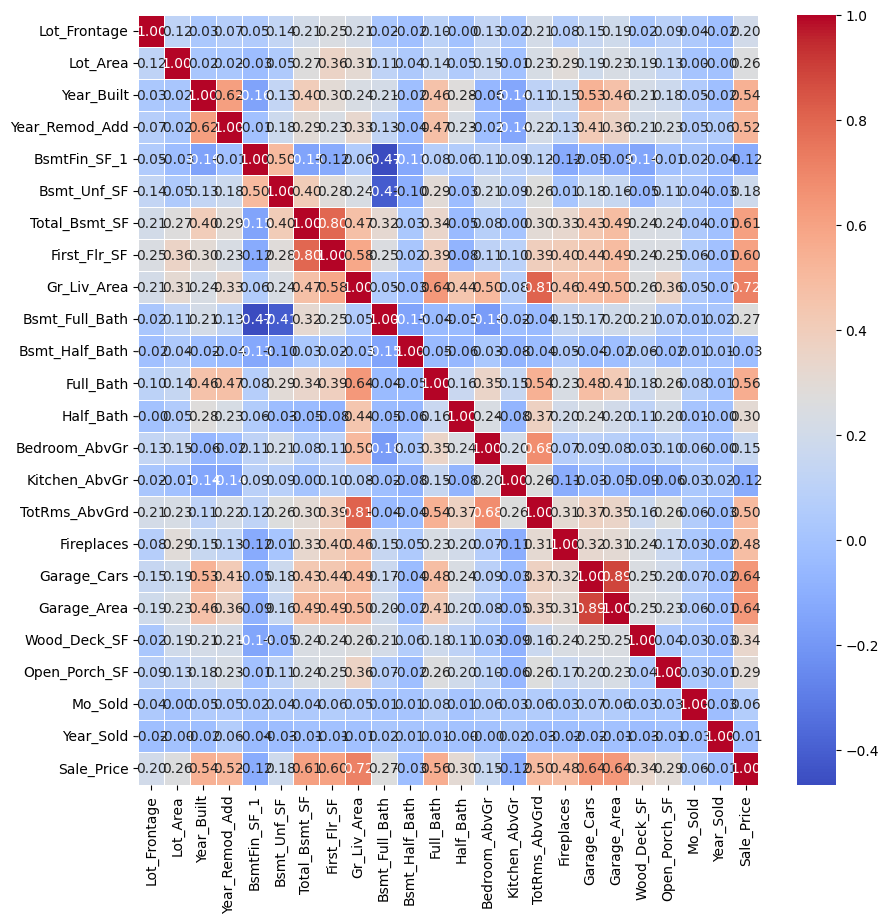

In [367]:
# in case of many variables, table may not be readable
plt.figure(figsize=(10, 10))
sns.heatmap(houses_correlations,
            annot = True, 
            cmap = 'coolwarm', 
            fmt = '.2f',
            linewidths = 0.5)

In [369]:
# lets make it easier to draw conclusions
# and also adjust the coloring to better see the strength of relationships

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(houses_correlations, dtype = bool))

# sort the correlations by the correlation with 'Sales_Price'

# get the correlation of all features with 'Sales_Price' and sort by the values
correlation_with_sale_price = houses_correlations.Sale_Price.sort_values(ascending = False)
# this is the order of columns based on correlation
ordered_columns = correlation_with_sale_price.index

# reorder the correlation matrix based on this order
houses_correlations = houses_correlations[ordered_columns].loc[ordered_columns]

In [373]:
# # in case of many variables, table may not be readable
# plt.figure(figsize=(10, 10))
# sns.heatmap(houses_correlations,
#             annot = True, 
#             cmap = 'coolwarm', 
#             fmt = '.2f',
#             linewidths = 0.5,
#             mask = mask)

<Axes: >

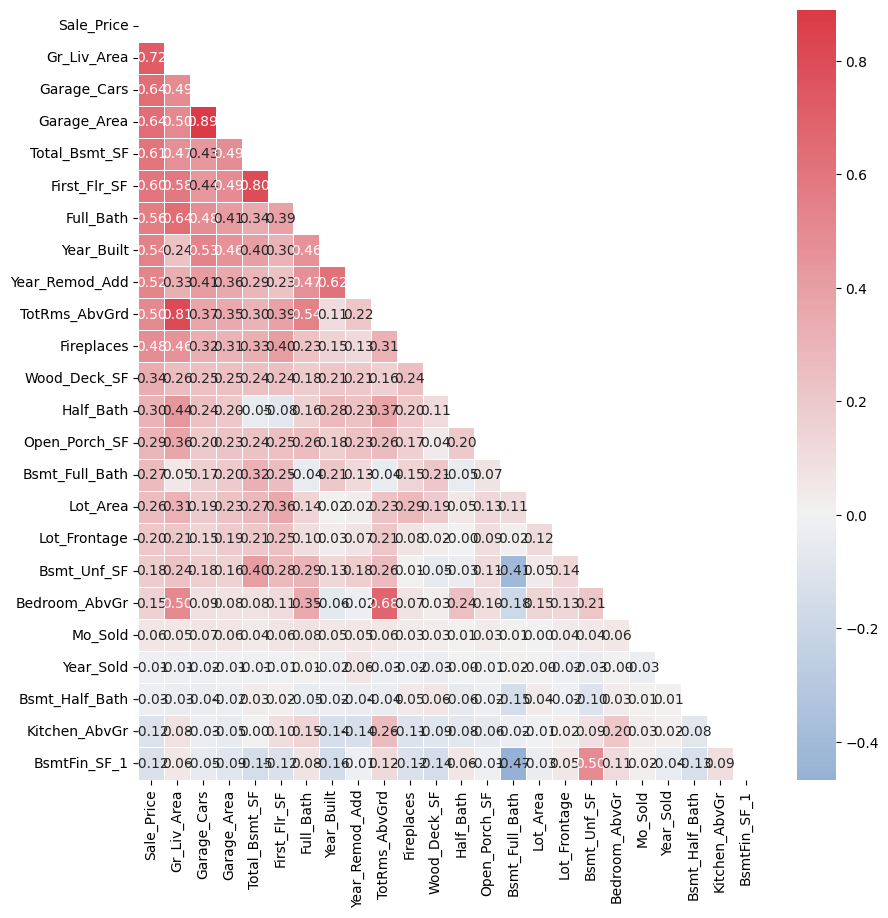

In [385]:
# Lets create a diverging colormap (blue for negative, white for zero, red for positive)
# The arguments 250 and 10 control the hues of the color palette.
# - 250 corresponds to a deep blue, and 10 corresponds to a red.
# as_cmap=True argument returns the palette as a colormap, 
# - which can be applied to sns.heatmap()

my_cmap = sns.diverging_palette(250, 10, as_cmap = True)
plt.figure(figsize=(10, 10))
sns.heatmap(houses_correlations,
           annot = True,
           cmap = my_cmap,
           mask = mask,
           fmt = '.2f',
           linewidths = 0.5,
           # this argument ensures that the color map is centered at 0, 
           # meaning 0 will be displayed in white
           center = 0)

<Axes: >

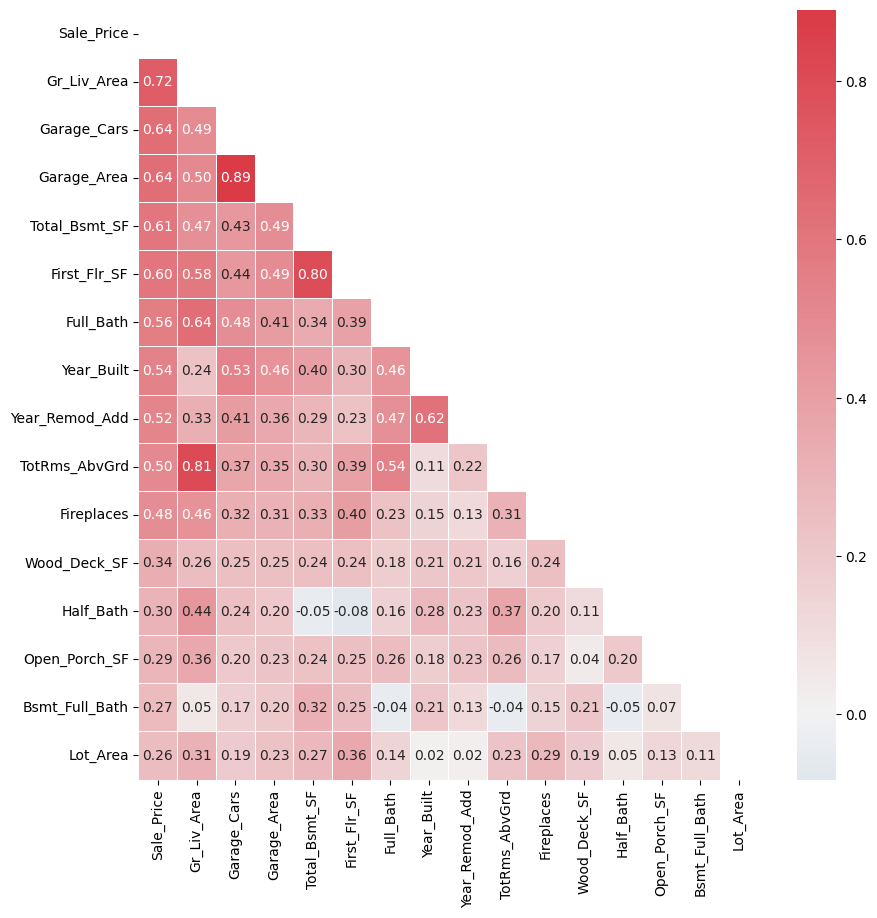

In [393]:
# lets focus on the first 15 variables which are most correlated with Sale_Price
plt.figure(figsize=(10, 10))
sns.heatmap(houses_correlations.iloc[:16, :16], # 16 as we have empty row for Sale_Price
            annot = True,
            cmap = my_cmap,
            mask = mask[:16, :16],
            fmt = '.2f',
            linewidths = 0.5,
            center = 0)

* Strong correlations, although not extremely high
* you can also see the potential problem of collinearity (interrelationship between predictors):
    * Garage_Cars and Garage_Area
    * Gr_liv_Area and TotRms_AbvGrd
    * FirstFlr_SF and Total_Bsmt_SF

In [402]:
# let's see the relation of the target variable
# with the three most strongly correlated variables

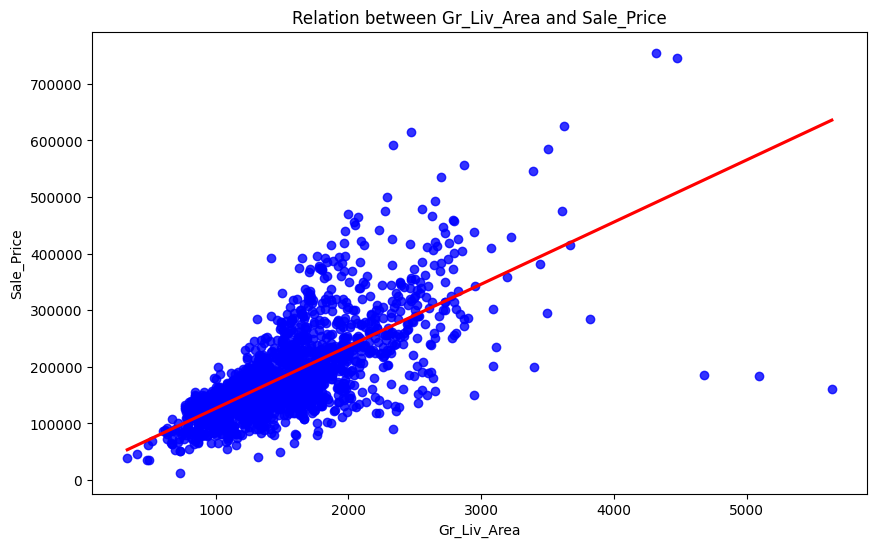

In [398]:
# Gr_Liv_Area

plt.figure(figsize=(10, 6))
sns.regplot(x = 'Gr_Liv_Area', 
            y = 'Sale_Price',
            data = houses_train,
            scatter_kws = {'color': 'blue'}, # color for the scatter points
            line_kws = {'color': 'red'},     # color for the regression line
            ci = None                        # No confidence interval for the line
           )
plt.title('Relation between Gr_Liv_Area and Sale_Price')
plt.xlabel('Gr_Liv_Area')
plt.ylabel('Sale_Price')
plt.show()

# 5 very large houses (area >4,000)
# including 3 outliers (area >4,500)
# - not matching the relationship

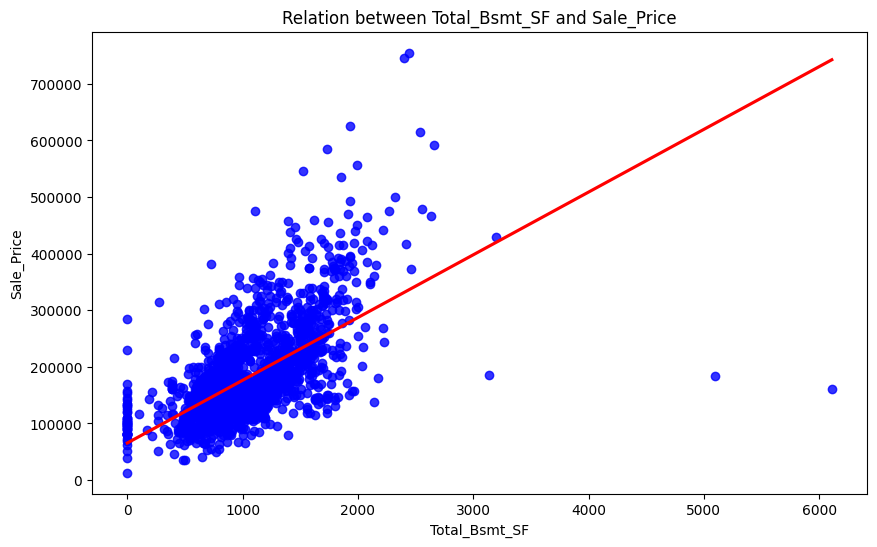

In [400]:
# Total_Bsmt_SF

plt.figure(figsize=(10, 6))
sns.regplot(x = 'Total_Bsmt_SF',
            y = 'Sale_Price',
            data = houses_train,
            scatter_kws = {'color': 'blue'},  # Color for the scatter points
            line_kws = {'color': 'red'},     # Color for the regression line
            ci = None)                      # No confidence interval for the line
plt.title('Relation between Total_Bsmt_SF and Sale_Price')
plt.xlabel('Total_Bsmt_SF')
plt.ylabel('Sale_Price')
plt.show()

# here again one can see (same?) 3 outliers in the bottom right quadrant
# - they might have impact on the results of traditional econometric models

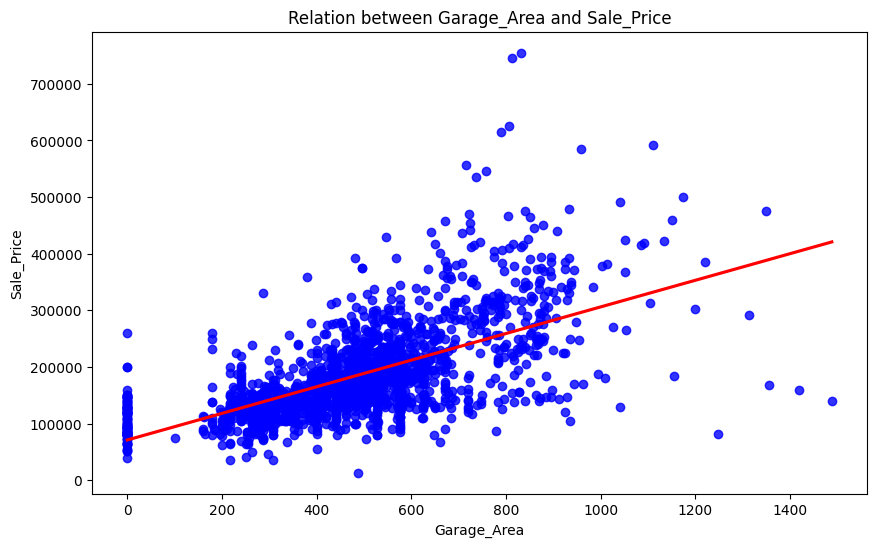

In [404]:
# Garage_Area
# strongly correlated with Garage_Cars

plt.figure(figsize=(10, 6))
sns.regplot(x = 'Garage_Area',
            y = 'Sale_Price',
            data = houses_train,
            scatter_kws = {'color': 'blue'},  # Color for the scatter points
            line_kws = {'color': 'red'},     # Color for the regression line
            ci = None)                      # No confidence interval for the line
plt.title('Relation between Garage_Area and Sale_Price')
plt.xlabel('Garage_Area')
plt.ylabel('Sale_Price')
plt.show()

In [417]:
# create a list of SELECTED numerical predictors:
# 15 with the highest Pearson correlation with the Sale_Price

houses_selected_numeric_vars = correlation_with_sale_price.index[1:16].to_list()

In [419]:
houses_selected_numeric_vars

['Gr_Liv_Area',
 'Garage_Cars',
 'Garage_Area',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Full_Bath',
 'Year_Built',
 'Year_Remod_Add',
 'TotRms_AbvGrd',
 'Fireplaces',
 'Wood_Deck_SF',
 'Half_Bath',
 'Open_Porch_SF',
 'Bsmt_Full_Bath',
 'Lot_Area']

In [421]:
# exlude 3 mutually correlated variables: Garage_Cars, TotRms_AbvGrd, First_Flr_SF
houses_selected_numeric_vars.remove('Garage_Cars')
houses_selected_numeric_vars.remove('TotRms_AbvGrd')
houses_selected_numeric_vars.remove('First_Flr_SF')

In [423]:
houses_selected_numeric_vars

['Gr_Liv_Area',
 'Garage_Area',
 'Total_Bsmt_SF',
 'Full_Bath',
 'Year_Built',
 'Year_Remod_Add',
 'Fireplaces',
 'Wood_Deck_SF',
 'Half_Bath',
 'Open_Porch_SF',
 'Bsmt_Full_Bath',
 'Lot_Area']

## Qualitative (Categorical) variables

In [427]:
# create a list of names of categorical variables
houses_categorical_variables = houses_train.select_dtypes('object').columns

In [435]:
houses_categorical_variables

Index(['MS_SubClass', 'MS_Zoning', 'Alley', 'Lot_Shape', 'Land_Contour',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Roof_Style',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating_QC', 'Central_Air',
       'Electrical', 'Kitchen_Qual', 'Fireplace_Qu', 'Garage_Type',
       'Garage_Finish', 'Garage_Qual', 'Garage_Cond', 'Paved_Drive', 'Fence',
       'Misc_Feature', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

### Target Variable is `Sale_Price` - (dependent variable)

In [437]:
# check their relationship with the target variable
# because the target variable is quantitative and explanatory
# these variables are qualitative, one can use the analysis of variance (ANOVA)

In [439]:
# let's see an example for a selected variable "MS_SubClass"
# fit the ANOVA model (Ordinary Least Squares regression)
# the C() function is used to indicate that MS_Subclass is a categorical variable
# - it is automatically recoded into dummies
model = smf.ols('Sale_Price ~ C(MS_SubClass)',
                data = houses_train).fit()

In [441]:
# perform ANOVA on the fitted model
anova_table = anova_lm(model)

In [443]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(MS_SubClass),11.0,3.163673e+12,2.876067e+11,59.152635,1.896894e-113
Residual,1929.0,9.379012e+12,4.862111e+09,NaN,NaN


In [445]:
# The F statistic is used to verify the null hypothesis that:
# H0: MS_SubClass does NOT impact the Sale_Price
# i.e. average Sale_Price does NOT differ
# for different values of MS_SubClass

# The higher the F-statistic (or the lower its p-value) the stronger we reject H0

In [453]:
anova_table['PR(>F)'].iloc[0]
# we can reject the H0, which means that MS_SubClass has impact on the Sale_Price

1.8968940644338892e-113

In [461]:
# write a function that retrieves this value for selected categorical variables in their
# - relation with a dependent variable and a dataset provided as a function argument

def anova_for_categorical_vars(dataset, dependent_var, categorical_vars):
    results = []
    for var in categorical_vars:
        model = smf.ols(f'{dependent_var} ~ C({var})', data = dataset).fit()
        anova_table = anova_lm(model)
        f_statistic = anova_table['F'].iloc[0]
        p_value = anova_table['PR(>F)'].iloc[0]
        results.append([var, f_statistic, p_value])
        
    anova_results_df = pd.DataFrame(results,
                                   columns = ['Variable', 'F-statistic', 'p-values'])
    anova_results_df = anova_results_df.sort_values(by = 'F-statistic', ascending = False)
    
    return anova_results_df

In [466]:
houses_anova_results = anova_for_categorical_vars(houses_train,
                                                  'Sale_Price',
                                                  houses_categorical_variables)

In [484]:
print(houses_anova_results)

          Variable  F-statistic       p-values
17      Exter_Qual   592.843153  2.546349e-273
28    Kitchen_Qual   550.172896  1.393897e-258
11    Overall_Qual   489.375685   0.000000e+00
20       Bsmt_Qual   388.357271  8.380136e-289
31   Garage_Finish   266.960041  5.351229e-145
29    Fireplace_Qu   178.505349  1.713150e-156
19      Foundation   171.918342  4.224578e-126
26     Central_Air   138.787363   5.433354e-31
16    Mas_Vnr_Type   129.928706   1.097031e-76
25      Heating_QC   127.296097   1.397421e-96
30     Garage_Type   124.024501  4.249802e-114
22   Bsmt_Exposure   116.011869   8.833151e-89
7     Neighborhood   115.988270   0.000000e+00
23  BsmtFin_Type_1    89.101251   7.044660e-99
37       Sale_Type    88.911583   1.910462e-69
13      Roof_Style    88.633219   1.469077e-37
38  Sale_Condition    84.879800   1.710445e-66
34     Paved_Drive    79.473191   6.724915e-34
3        Lot_Shape    70.317833   3.653776e-43
0      MS_SubClass    59.152635  1.896894e-113
1        MS_Z

In [508]:
# let's see the relation of the target variable with the three categorical variables
# - which are the most strongly associated with it
# Exter_Qual, Kitchen_Qual, Overall_Qual -> these variables have an impact on house prices

# y is dependent variable and x is independent variable

<Axes: xlabel='Exter_Qual', ylabel='Sale_Price'>

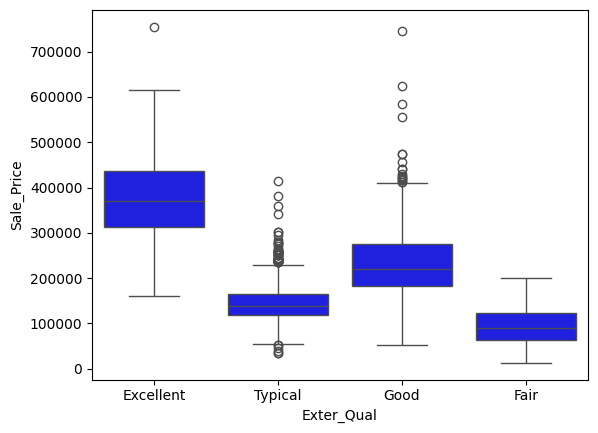

In [506]:
sns.boxplot(x = 'Exter_Qual',
            y = 'Sale_Price',
            data = houses_train,
            color = 'blue')

<Axes: xlabel='Exter_Qual', ylabel='Sale_Price'>

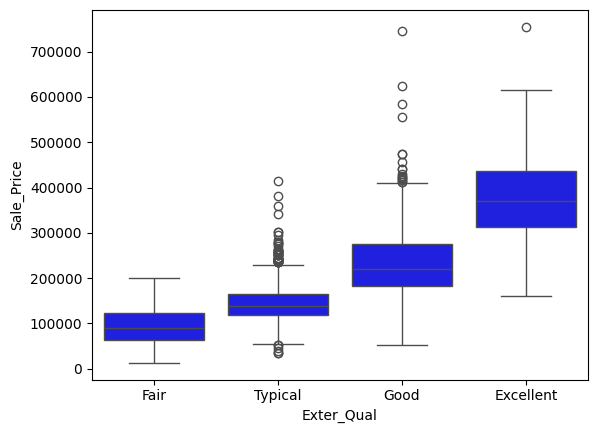

In [510]:
# we need to adjust the order of labels on the horizontal axis
sns.boxplot(x = 'Exter_Qual',
            y = 'Sale_Price',
            data = houses_train,
            color = 'blue',
            order = ['Fair', 'Typical', 'Good', 'Excellent'])
# clear monotonic relationship

<Axes: xlabel='Kitchen_Qual', ylabel='Sale_Price'>

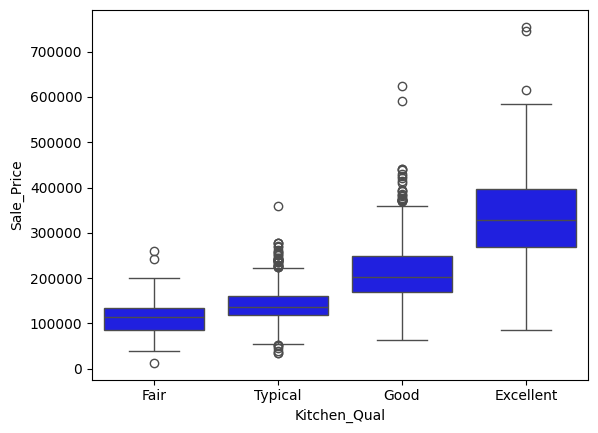

In [524]:
# check the relationship of 'Kitchen_Qual' and 'Sale_Price'
sns.boxplot(x = 'Kitchen_Qual', 
            y = 'Sale_Price',
            data = houses_train,
            color = 'blue',
            order = ['Fair', 'Typical', 'Good', 'Excellent'])

In [530]:
houses_train.Overall_Qual.value_counts()

Overall_Qual
Average           554
Above_Average     486
Good              397
Very_Good         238
Below_Average     141
Excellent          68
Fair               26
Very_Excellent     23
Poor                5
Very_Poor           3
Name: count, dtype: int64

<Axes: xlabel='Overall_Qual', ylabel='Sale_Price'>

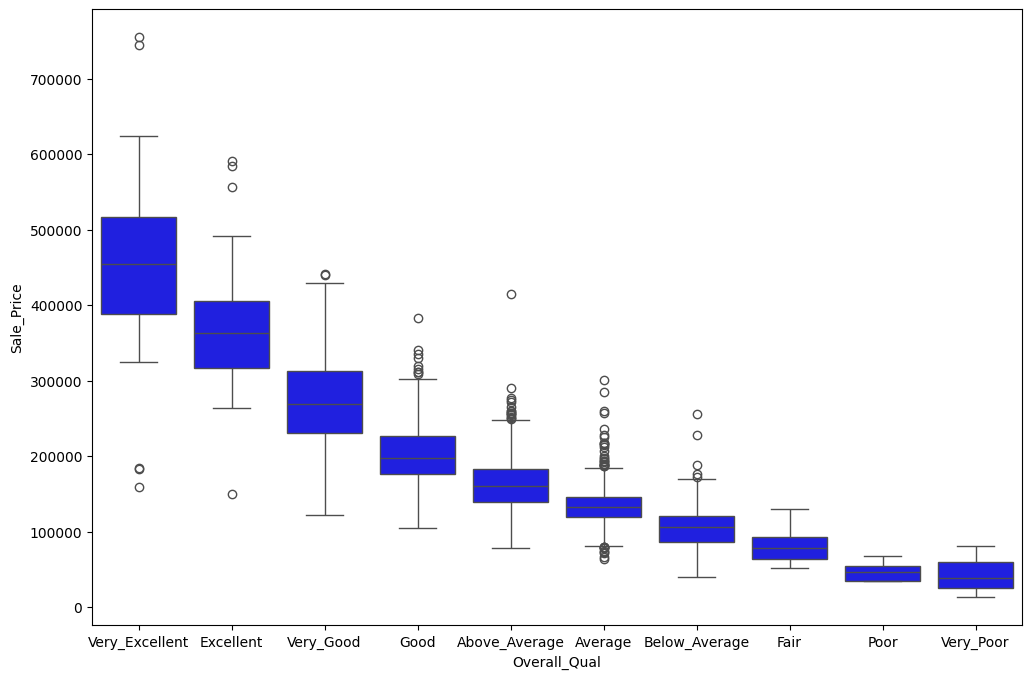

In [554]:
# Check the relationship of'Overall_Qual' vs 'Sale_Price'
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'Overall_Qual',
            y = 'Sale_Price',
            data = houses_train,
            color  ='blue',
            order = ['Very_Excellent', 'Excellent', 'Very_Good', 'Good', 'Above_Average',
                     'Average', 'Below_Average', 'Fair','Poor', 'Very_Poor'])
# plt.tight_layout()

In [562]:
"""
check the mutual relationship between categorical predictors in a way similar to 
- correlation matrix

the strength of relation between two CATEGORICAL variables can be tested using 
- the Cramer's V coefficient
(calculated on the basis of Chi2 test statistic)
# Cramer's V takes values from 0 to 1, where higher values mean a stronger relationship
(if both variables have only two levels Cramer's V takes values from -1 to 1)
"""

"\ncheck the mutual relationship between categorical predictors in a way similar to \n- correlation matrix\n\nthe strength of relation between two CATEGORICAL variables can be tested using \n- the Cramer's V coefficient\n(calculated on the basis of Chi2 test statistic)\n# Cramer's V takes values from 0 to 1, where higher values mean a stronger relationship\n(if both variables have only two levels Cramer's V takes values from -1 to 1)\n"

In [568]:
def cramers_v(contingency_table):
    # calculate cramer's v statistic from a contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

def calculate_cramers_v_matrix(dataset, categorical_vars):
    # calculate cramer's v for each pair of categorical variables
    # create an empty matrix to store the results
    cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_vars), 
                       len(categorical_vars))), 
                       columns = categorical_vars,
                       index = categorical_vars)

    for i in range(len(categorical_vars)):
        for j in range(i, len(categorical_vars)):
            var_1 = categorical_vars[i]
            var_2 = categorical_vars[j]
            # create a contingency table for the two variables
            contingency_table = pd.crosstab(dataset[var_1], dataset[var_2])
            # calculate cramer's v
            cramers_v_value = cramers_v(contingency_table)
            # store the result in matrix
            cramers_v_matrix.loc[var_1, var_2] = cramers_v_value
            cramers_v_matrix.loc[var_2, var_1] = cramers_v_value  # symmetric matrix
    return cramers_v_matrix

In [572]:
# and apply the analysis to our data
houses_cramers_v_matrix = calculate_cramers_v_matrix(
                                    houses_train, houses_categorical_variables)

In [576]:
# lets order variables in rows and columns according to the
# (decreasing) strength of their relationship with the outcome variable
# 'Sale_Price' - remember ANOVA results
houses_anova_results.head()

,Variable,F-statistic,p-values
17,Exter_Qual,592.843153,2.546349e-273
28,Kitchen_Qual,550.172896,1.393897e-258
11,Overall_Qual,489.375685,0.000000e+00
20,Bsmt_Qual,388.357271,8.380136e-289
31,Garage_Finish,266.960041,5.351229e-145


In [578]:
# reorder the cramer's v matrix based on this order
variables_order = houses_anova_results.Variable.to_list()
houses_cramers_v_matrix = houses_cramers_v_matrix[variables_order].loc[variables_order]

In [580]:
mask = np.triu(np.ones_like(houses_cramers_v_matrix, dtype = bool))

<Axes: >

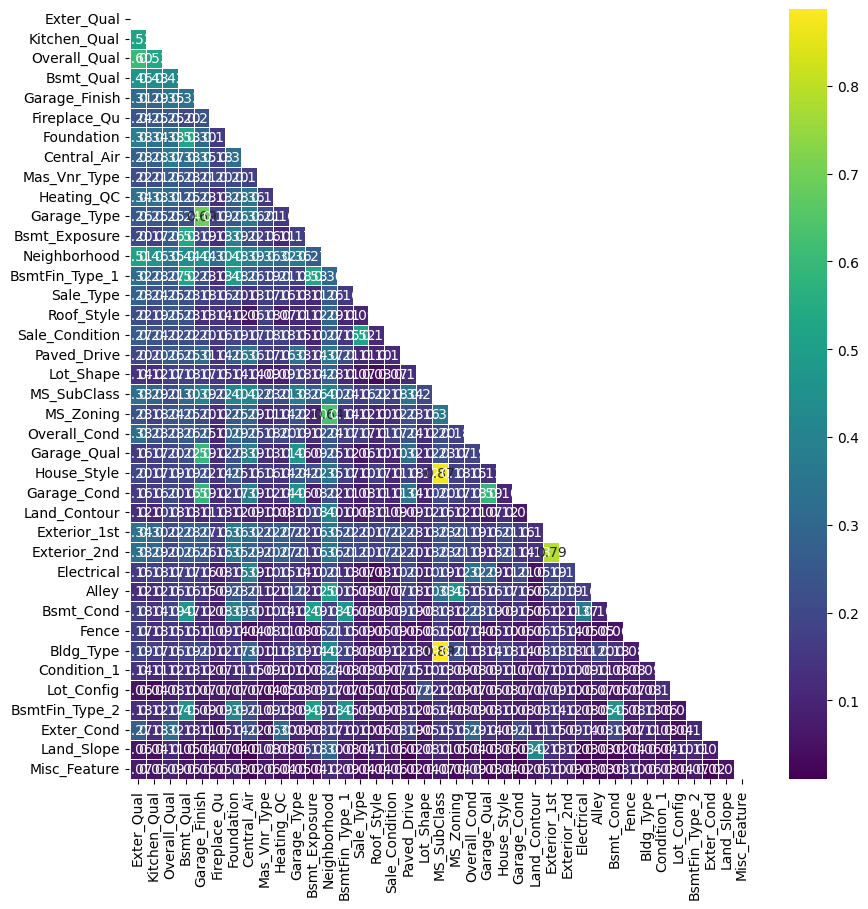

In [582]:
plt.figure(figsize=(10, 10))
sns.heatmap(houses_cramers_v_matrix,
            annot = True,
            cmap = 'viridis',
            fmt = '.2f',
            mask = mask,
            linewidths = 0.5)

<Axes: >

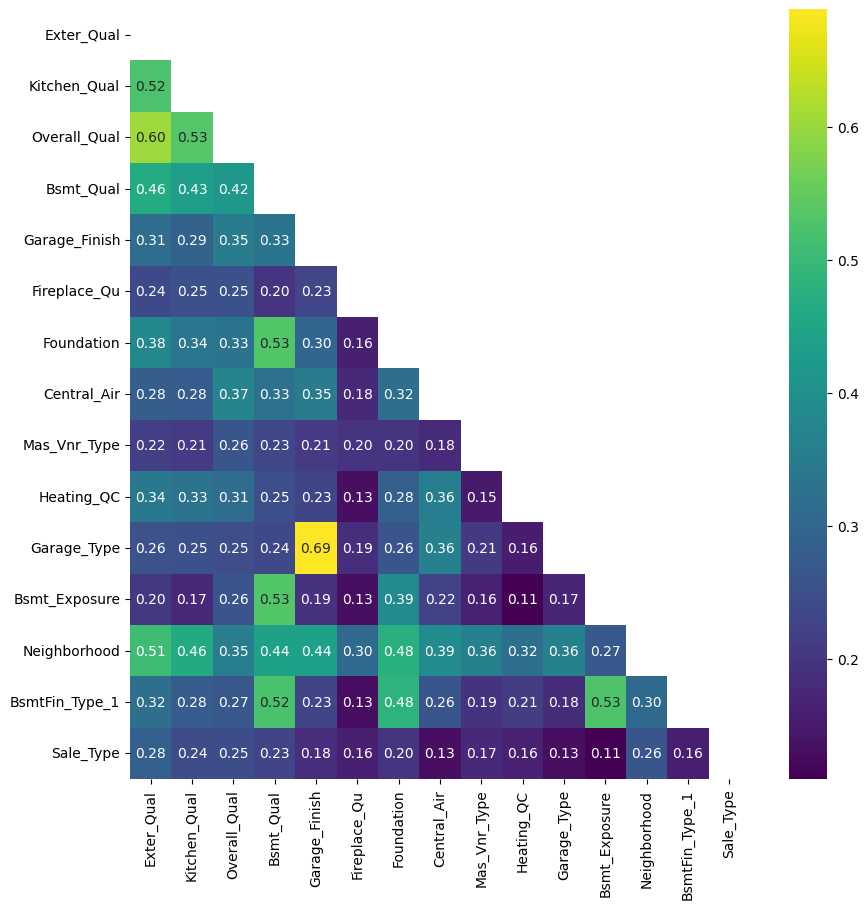

In [584]:
# focus on top 15 categorical predictors (down to 'Sale_Type')

plt.figure(figsize=(10, 10))
sns.heatmap(houses_cramers_v_matrix.iloc[:15, :15],
            annot = True,
            cmap = 'viridis', 
            fmt = '.2f',
            mask = mask[:15, :15])

# there are no very strong relationships:
# 'Garage_Type' vs 'Garage_Finish'
# 'Exter_Qual' vs 'Overall_Qual'

In [594]:
# lets create a list of SELECTED categorical predictors:
# 15 with the highest Cramer's with the Sale_Price
houses_selected_categorical_vars = houses_anova_results[0:15]['Variable'].tolist()

In [596]:
houses_selected_categorical_vars

['Exter_Qual',
 'Kitchen_Qual',
 'Overall_Qual',
 'Bsmt_Qual',
 'Garage_Finish',
 'Fireplace_Qu',
 'Foundation',
 'Central_Air',
 'Mas_Vnr_Type',
 'Heating_QC',
 'Garage_Type',
 'Bsmt_Exposure',
 'Neighborhood',
 'BsmtFin_Type_1',
 'Sale_Type']

In [598]:
# but exclude from this list 2 relatively strongly mutually related with the others:
# Garage_Type, Overall_Qual
houses_selected_categorical_vars.remove('Garage_Type')
houses_selected_categorical_vars.remove('Overall_Qual')

In [600]:
houses_selected_categorical_vars

['Exter_Qual',
 'Kitchen_Qual',
 'Bsmt_Qual',
 'Garage_Finish',
 'Fireplace_Qu',
 'Foundation',
 'Central_Air',
 'Mas_Vnr_Type',
 'Heating_QC',
 'Bsmt_Exposure',
 'Neighborhood',
 'BsmtFin_Type_1',
 'Sale_Type']

In [602]:
# In the end we can combine them into a single list of SELECTED predictors
# - 12 numerical most correlated with the target
# - 13 categorical most related (ANOVA) with the target

houses_selected_vars = houses_selected_numeric_vars + houses_selected_categorical_vars

In [608]:
houses_selected_vars

['Gr_Liv_Area',
 'Garage_Area',
 'Total_Bsmt_SF',
 'Full_Bath',
 'Year_Built',
 'Year_Remod_Add',
 'Fireplaces',
 'Wood_Deck_SF',
 'Half_Bath',
 'Open_Porch_SF',
 'Bsmt_Full_Bath',
 'Lot_Area',
 'Exter_Qual',
 'Kitchen_Qual',
 'Bsmt_Qual',
 'Garage_Finish',
 'Fireplace_Qu',
 'Foundation',
 'Central_Air',
 'Mas_Vnr_Type',
 'Heating_QC',
 'Bsmt_Exposure',
 'Neighborhood',
 'BsmtFin_Type_1',
 'Sale_Type']

In [610]:
with open('data_pkl/houses_selected_vars.pkl', 'wb') as f:
    pickle.dump(houses_selected_vars, f)

# 3. Linear Regression

In [615]:
with open('data_pkl/houses_prepared.pkl', 'rb') as f:
    houses_train = pickle.load(f)
    houses_test = pickle.load(f)

In [619]:
houses_test.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Alley,Lot_Shape,Land_Contour,Lot_Config,...,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Fence,Misc_Feature,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,526301100,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,No_Alley_Access,Slightly_Irregular,Lvl,Corner,...,Partial_Pavement,210,62,No_Fence,None,5,2010,WD,Normal,215000
1,2,526350040,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,No_Alley_Access,Regular,Lvl,Inside,...,Paved,140,0,Minimum_Privacy,None,6,2010,WD,Normal,105000
2,3,526351010,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,No_Alley_Access,Slightly_Irregular,Lvl,Corner,...,Paved,393,36,No_Fence,Other,6,2010,WD,Normal,172000
3,4,526353030,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,No_Alley_Access,Regular,Lvl,Corner,...,Paved,0,0,No_Fence,None,4,2010,WD,Normal,244000
4,5,527105010,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,No_Alley_Access,Slightly_Irregular,Lvl,Inside,...,Paved,212,34,Minimum_Privacy,None,3,2010,WD,Normal,189900


## Model Estimation

Let's estimate the first model. Since we will be interested in the interpretation of individual parameters, not just prediction, we will use the methods from the `statsmodels` library. The model formula is given in the `dependent_variable ~ independent_variables` system.\
`Y ~ X` for simple regression with one explained variable (X).

If you want to include more explanatory variables, they should be separated in the model formula with pluses "`+`", ex: `Y ~ X1 + X2 + X3`.

In [625]:
# total area above the ground as the only predictor
houses_model1 = smf.ols(formula = 'Sale_Price ~ Gr_Liv_Area', 
                data = houses_train).fit()   # fit method estimates the coefficients

In [627]:
# Alternatively, without specifying a formula, which is useful in the case of
# multiple variables, including decoded qualitative ones:
X = sm.add_constant(houses_train.Gr_Liv_Area) # adding a constant to X matrix
houses_model1 = sm.OLS(houses_train.Sale_Price, X).fit()

In [629]:
# however, OLS function requires all variables to be numeric
# so we need to convert categorical variables into dummies.
# OLS function does allow for categorical variables, but they need to be specified 
# as such in the formula.

In [631]:
print(houses_model1.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     2039.
Date:                Thu, 08 May 2025   Prob (F-statistic):          7.22e-305
Time:                        20:25:46   Log-Likelihood:                -23980.
No. Observations:                1941   AIC:                         4.796e+04
Df Residuals:                    1939   BIC:                         4.797e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.68e+04   3875.120      4.334      

---
It can be seen that `Gr_Liv_Area` DOES significantly affect the price of a house having p-value (`P>|t|`) = 0.000

On top of the results we also have the displayed value:

* `R-squared`: Multiple R-squared: 0.513
* `Adj. R-squared`: Adjusted R-squared: 0.512

* `F-statistic`: testing the joint significance of the model and its p-value: F-statistic: 2039,  p-value: < 7.22e-305
* `AIC`: Akaike Information Criterion
* `BIC`: Bayesian Information Criterion

In [635]:
# estimate the model with more explanatory variables (quantitative)
houses_model2 = smf.ols(
    formula = 'Sale_Price ~ Gr_Liv_Area + Garage_Area + Full_Bath + Year_Built + TotRms_AbvGrd',
    data = houses_train
).fit()

In [637]:
print(houses_model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     876.7
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        20:49:13   Log-Likelihood:                -23528.
No. Observations:                1941   AIC:                         4.707e+04
Df Residuals:                    1935   BIC:                         4.710e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.574e+06   8.05e+04    -19.559

* Using more variables we explain 69% of the variability of the `Sale_Price` (R2)!

* all used variables are statistically significant except for `Full_Bath`

* `AIC` and `BIC` are lower than for model 1

In [642]:
# lets add some qualitative explanatory variables to the model
# the ols() function does not require the conversion of categorical variables into dummies
# it is done automatically, but we need to specify the type of the variable in the formula
# with the C() function

houses_model3 = smf.ols(
    formula ='Sale_Price ~ Gr_Liv_Area + Garage_Area + Full_Bath + Year_Built + TotRms_AbvGrd + C(Exter_Qual) + C(Kitchen_Qual) + C(Overall_Qual) + C(Central_Air) + C(Foundation)',
    data = houses_train
).fit()

In [644]:
print(houses_model3.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     342.2
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        21:03:24   Log-Likelihood:                -23028.
No. Observations:                1941   AIC:                         4.611e+04
Df Residuals:                    1915   BIC:                         4.625e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [646]:
# Model with all variables
# ! Lets create a formula automatically ensuring
# that all categorical variables are treated properly

# it is only possible within the ols() function

houses_train2 = houses_train.drop(columns = ['Order', 'PID'])

houses_model4 = smf.ols(
    formula = 'Sale_Price ~ ' + ' + '.join(f'C({col})' if houses_train2[col].dtype == 'object' else col for col in houses_train2.columns if col != 'Sale_Price'),
    data = houses_train2
).fit()

In [648]:
print(houses_model4.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     74.14
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        21:05:18   Log-Likelihood:                -22428.
No. Observations:                1941   AIC:                         4.528e+04
Df Residuals:                    1727   BIC:                         4.648e+04
Df Model:                         213                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [650]:
# load the data about houses divided into train and test samples
# prepared and saved earlier - AFTER encoding of categorical predictors

with open('data_pkl/houses_prepared_encoded.pkl', 'rb') as f: # read in a binary mode
    houses_train_encoded = pickle.load(f)
    houses_test_encoded = pickle.load(f)

In [652]:
houses_test_encoded.head()

,Order,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,...,Sale_Type_New,Sale_Type_Other,Sale_Type_WD,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Other,Sale_Condition_Partial,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl
0,1,526301100,141,31770,1.0,0.0,4.0,5.0,1960,1960,...,0,0,1,0,1,0,0,0,0,1
1,2,526350040,80,11622,0.0,0.0,5.0,4.0,1961,1961,...,0,0,1,0,1,0,0,0,0,1
2,3,526351010,81,14267,1.0,0.0,4.0,4.0,1958,1958,...,0,0,1,0,1,0,0,0,0,1
3,4,526353030,93,11160,0.0,0.0,3.0,5.0,1968,1968,...,0,0,1,0,1,0,0,0,0,1
4,5,527105010,74,13830,1.0,0.0,5.0,5.0,1997,1998,...,0,0,1,0,1,0,0,0,0,1


In [654]:
# although ordinal features were recoded with the OrdinalEncoder, 
# they still have the type "object" in the DataFrame
houses_train_encoded.select_dtypes(include="object").head()

,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Exter_Qual,Exter_Cond,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_Type_2,Heating_QC,Electrical,Kitchen_Qual,Fireplace_Qu,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Fence
989,1.0,0.0,4.0,2.0,0.0,2.0,1.0,2.0,3.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,4.0
990,1.0,0.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,4.0
991,0.0,0.0,4.0,5.0,2.0,2.0,3.0,2.0,2.0,1.0,4.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,4.0
992,1.0,0.0,4.0,5.0,2.0,2.0,2.0,2.0,3.0,2.0,5.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,4.0
993,0.0,0.0,4.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,5.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,4.0


In [660]:
# to make sure that the type of the variable is correct,
# we can convert it to the numeric type
houses_train_encoded = houses_train_encoded.apply(pd.to_numeric)

In [662]:
# ensures all columns are numeric
houses_train_encoded.select_dtypes(include="object").columns

Index([], dtype='object')

In [664]:
# now we can prepare the data for the model
X_train = sm.add_constant(houses_train_encoded.drop(
    columns=['Sale_Price', 'Order', 'PID']
))

y_train = houses_train_encoded['Sale_Price']  # dependent variable

In [672]:
model5_full = sm.OLS(y_train, X_train).fit()

In [676]:
print(model5_full.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     90.99
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        21:38:31   Log-Likelihood:                -22598.
No. Observations:                1941   AIC:                         4.549e+04
Df Residuals:                    1792   BIC:                         4.632e+04
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [681]:
# define the function that will perform backward elimination
# using AIC or BIC as the criterion

def backward_elimination_aic_bic(X, y, criterion = 'AIC'):
    model = sm.OLS(y, X).fit()
    while len(X.columns) > 1: # at least one predictor + constant
        best_criterion = model.aic if criterion == 'AIC' else model.bic
        # computer AIC/BIC for models without each predictor
        aic_bic_values = {}
        for col in X.columns[1:]:  # skip intercept
            X_new = X.drop(columns = [col])
            new_model = sm.OLS(y, X_new).fit()
            aic_bic_values[col] = new_model.aic if criterion == 'AIC' else new_model.bic
        worst_feature = min(aic_bic_values, key=aic_bic_values.get)
        worst_aic_bic = aic_bic_values[worst_feature]
        # stop if no improvement
        if worst_aic_bic >= best_criterion:
            break
        # remove the feature and update the model
        X = X.drop(columns = [worst_feature])
        model = sm.OLS(y, X).fit()
    return model

In [ ]:
# Example Usage
# !!! CAUTION !!! This function may take ca 5 mins to run
# Perform backward elimination using AIC
houses_model5_AIC = backward_elimination_aic_bic(X_train, y_train,
                                                 criterion = 'AIC')

In [ ]:
# save the model as a pickle file
with open('data/houses_model5_AIC.pkl', 'wb') as f:
    pickle.dump(houses_model5_AIC, f)

In [695]:
# load the model from the file
with open('data_pkl/houses_model5_AIC.pkl', 'rb') as f:
    houses_model5_AIC = pickle.load(f)

In [697]:
print(houses_model5_AIC.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     177.7
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        21:54:17   Log-Likelihood:                -22618.
No. Observations:                1941   AIC:                         4.539e+04
Df Residuals:                    1863   BIC:                         4.583e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
# !!! CAUTION !!! This function may take ca 5 mins to run
# Perform backward elimination using BIC
houses_model5_BIC = backward_elimination_aic_bic(X_train, y_train, criterion = 'BIC')

In [ ]:
# save the model as a pickle file
with open('data/houses_model5_BIC.pkl', 'wb') as f:
    pickle.dump(houses_model5_BIC, f)

In [699]:
# load the model from the file
with open('data_pkl/houses_model5_BIC.pkl', 'rb') as f:
    houses_model5_BIC = pickle.load(f)

In [701]:
print(houses_model5_BIC.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     271.7
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        21:54:24   Log-Likelihood:                -22672.
No. Observations:                1941   AIC:                         4.544e+04
Df Residuals:                    1892   BIC:                         4.571e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [717]:
print(model.params)

Intercept                                                      134523.812500
C(MS_SubClass)[T.One_Story_1945_and_Older]                     -34153.471591
C(MS_SubClass)[T.One_Story_1946_and_Newer_All_Styles]           49854.542896
C(MS_SubClass)[T.One_Story_PUD_1946_and_Newer]                  80354.030784
C(MS_SubClass)[T.One_and_Half_Story_Finished_All_Ages]           4028.270833
C(MS_SubClass)[T.Other]                                         14354.187500
C(MS_SubClass)[T.Split_Foyer]                                   15384.808190
C(MS_SubClass)[T.Split_or_Multilevel]                           29188.135552
C(MS_SubClass)[T.Two_Family_conversion_All_Styles_and_Ages]     -1271.290761
C(MS_SubClass)[T.Two_Story_1945_and_Older]                      24469.728676
C(MS_SubClass)[T.Two_Story_1946_and_Newer]                     108538.772500
C(MS_SubClass)[T.Two_Story_PUD_1946_and_Newer]                   2261.891204
dtype: float64


In [707]:
# Do both approaches give the same coefficients?
houses_model5_AIC.params.equals(houses_model5_BIC)

# answer is No from the outcome

False

In [719]:
# which variables retained based on AIC were not selected by BIC?
set(houses_model5_AIC.params.index) - set(houses_model5_BIC.params.index)

{'Condition_1_Other',
 'Condition_1_PosN',
 'Condition_1_RRAn',
 'Exterior_1st_Other',
 'Exterior_2nd_BrkFace',
 'Exterior_2nd_MetalSd',
 'Exterior_2nd_Wd Shng',
 'First_Flr_SF',
 'Foundation_PConc',
 'Full_Bath',
 'Garage_Area',
 'Garage_Type_Other',
 'Half_Bath',
 'Heating_QC',
 'House_Style_One_and_Half_Fin',
 'House_Style_Other',
 'House_Style_SFoyer',
 'House_Style_SLvl',
 'House_Style_Two_Story',
 'Lot_Area',
 'Lot_Config_FR2',
 'Mas_Vnr_Type_Stone',
 'Neighborhood_Meadow_Village',
 'Neighborhood_Old_Town',
 'Open_Porch_SF',
 'Sale_Condition_Normal',
 'Sale_Condition_Other',
 'TotRms_AbvGrd',
 'Year_Sold'}

In [721]:
# were there any variables retained based on BIC that were not selected by AIC?
set(houses_model5_BIC.params.index) - set(houses_model5_AIC.params.index)

# No! As expected, BIC was more restrictive than AIC

set()

# 4. Logistic Regression

In [726]:
# lets load the churn dataset divided into train and test samples
# prepared and saved earlier - BEFORE encoding of categorical predictors

churn_train = pd.read_pickle('data_pkl/churn_train.pkl')
churn_test = pd.read_pickle('data_pkl/churn_test.pkl')

In [728]:
churn_train.head()

,customer_id,customer_age,customer_gender,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,...,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
3681,425655,47,Unknown,4,Graduate,Married,60-80K,34,9261.0,Blue,...,3,0,1605,7656.0,0.571,8670,44,0.419,0.173,0
4863,533755,62,F,1,High School,Single,below 40K,36,1930.0,Blue,...,3,4,0,1930.0,0.331,1971,45,0.250,0.000,1
7575,775601,48,F,1,Unknown,Unknown,40-60K,36,2447.0,Blue,...,1,3,1991,456.0,0.719,4228,82,0.708,0.814,0
8249,837342,47,M,4,High School,Married,80-120K,37,2888.0,Blue,...,3,3,0,2888.0,0.717,4345,75,0.786,0.000,0
4723,521251,49,Unknown,3,Graduate,Married,below 40K,43,2174.0,Blue,...,3,2,785,1389.0,0.657,3890,78,0.660,0.361,0


## Logit model

Let's estimate the first model. Similarly as for a linear regression we can use the methods from the `statsmodels` library which also allows estimating a `logistic regression` model by providing its formula and automatically recoding categorical predictors into dummies.

The model formula is given in the `dependent_variable ~ independent_variables` system, ex: `Y ~ X` for simple regression with one explained variable (X).

If we want to include more explanatory variables, they should be separated in the model formula with pluses "`+`", ex: `Y ~ X1 + X2 + X3`.

In [732]:
# estimate the model with only one explanatory variable: customer_available_credit_limit
churn_logit1 = smf.logit(
    formula = 'account_status ~ customer_available_credit_limit',
    data = churn_train
).fit()

Optimization terminated successfully.
         Current function value: 0.440671
         Iterations 6


In [734]:
# alternatively, without specifying a formula, which is useful in the case of multiple
# variables, including decoded qualitative ones.
X = sm.add_constant(churn_train['customer_available_credit_limit'])
churn_logit1 = sm.Logit(churn_train['account_status'], X).fit()  # model estimation

Optimization terminated successfully.
         Current function value: 0.440671
         Iterations 6


In [736]:
# however, Logit function requires all variables to be numeric
# so we need to convert categorical variables into dummies
# Logit function DOES allow for categorical variables, but they need to be specified as 
# such in the formula. Using C() function for Categorical variables.

In [738]:
print(churn_logit1.summary())

                           Logit Regression Results                           
Dep. Variable:         account_status   No. Observations:                 7088
Model:                          Logit   Df Residuals:                     7086
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 May 2025   Pseudo R-squ.:               0.0003369
Time:                        23:49:26   Log-Likelihood:                -3123.5
converged:                       True   LL-Null:                       -3124.5
Covariance Type:            nonrobust   LLR p-value:                    0.1468
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6236      0.039    -42.134      0.000      -1.699      -1.548
customer_available_credit_limit -3.025e-06   2.21e-06     -1.370    

---
In the lower part of results, we can see estimates of individual model parameters (only two here), their standard errors, t-statistics, their p-values and 95% confidence intervals.

It can be seen that `customer_available_credit_limit` DOES NOT significantly affect the risk of churning with having p-value (`P>|t|`) = 0.171

On top of the results we also have the displayed value:
* `Pseudo R-squ.`: Multiple R-squared: 0.0.0003369
* `LLR p-value:`: testing the joint significance of the model (based on the comparison of `Log-Likelihood` and `LL-Null`)

In [743]:
# Model with all variables
# ! create a formula automatically ensuring that all categorical variables are treated 
# properly, !!! It is only possible within the logit() function

churn_train2 = churn_train.drop('customer_id', axis=1)
churn_logit2 = smf.logit(
    formula = 'account_status ~ ' + ' + '.join(f'C({col})' if churn_train2[col].dtype == 'object' else col for col in churn_train2.columns if col != 'account_status'),
    data = churn_train2
).fit()

Optimization terminated successfully.
         Current function value: 0.273312
         Iterations 8


In [745]:
print(churn_logit2.summary())

                           Logit Regression Results                           
Dep. Variable:         account_status   No. Observations:                 7088
Model:                          Logit   Df Residuals:                     7054
Method:                           MLE   Df Model:                           33
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.3800
Time:                        00:04:07   Log-Likelihood:                -1937.2
converged:                       True   LL-Null:                       -3124.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  3.5582      0.445      7.997      0.000       2.686       4.430
customer_gender[T.M]                      -0.53

* `Pseudo R-squ.` increased to 0.380
* the whole model is now jointly significant

In [748]:
# if you are interested in the odds-ratios
np.exp(churn_logit2.params)

# (of course it does not make sense for the intercept term)

Intercept                                 35.100793
customer_gender[T.M]                       0.587375
customer_gender[T.Unknown]                 1.001904
customer_education[T.Uneducated]           1.064623
customer_education[T.High School]          0.960686
customer_education[T.College]              0.836559
customer_education[T.Graduate]             0.918880
customer_education[T.Post-Graduate]        1.278999
customer_education[T.Doctorate]            1.422124
customer_civil_status[T.Married]           0.716026
customer_civil_status[T.Single]            1.148224
customer_civil_status[T.Unknown]           1.205895
customer_salary_range[T.below 40K]         1.028800
customer_salary_range[T.40-60K]            0.987502
customer_salary_range[T.60-80K]            0.924975
customer_salary_range[T.80-120K]           1.297488
customer_salary_range[T.120K and more]     1.718336
credit_card_classification[T.Gold]         4.446365
credit_card_classification[T.Platinum]     4.818443
credit_card_

In [750]:
# lets see how to predict probabilities of account_status = closed(1) for the
# test dataset. In case of the logit() function result, the method .predict()
# returns the probabilities for 1

predictions_churn_logit2 = churn_logit2.predict(
    churn_test.drop(['account_status', 'customer_id'], axis = 1)
)

In [756]:
predictions_churn_logit2.head()

3987    0.000900
887     0.031183
7472    0.013160
3449    0.005081
6708    0.004330
dtype: float64

## Probit model

In [759]:
# In a similar manner we can apply the probit model with the probit() function
# lets keep the resulting object name with 2 at the end for consistency with a similar
# logit model
churn_probit2 = smf.probit(
    formula = 'account_status ~ ' + ' + '.join(f'C({col})' if churn_train2[col].dtype == 'object' else col for col in churn_train2.columns if col != 'account_status'),
    data = churn_train2
).fit()

Optimization terminated successfully.
         Current function value: 0.278358
         Iterations 7


In [761]:
print(churn_probit2.summary())

                          Probit Regression Results                           
Dep. Variable:         account_status   No. Observations:                 7088
Model:                         Probit   Df Residuals:                     7054
Method:                           MLE   Df Model:                           33
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.3685
Time:                        00:30:17   Log-Likelihood:                -1973.0
converged:                       True   LL-Null:                       -3124.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.6756      0.237      7.077      0.000       1.212       2.140
customer_gender[T.M]                      -0.27

In [763]:
# for probit there are no odd-ratios but you can get the marginal effects
churn_probit2_me = churn_probit2.get_margeff()

In [765]:
print(churn_probit2_me.summary())

       Probit Marginal Effects       
Dep. Variable:         account_status
Method:                          dydx
At:                           overall
                                            dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
customer_gender[T.M]                      -0.0439      0.011     -3.845      0.000      -0.066      -0.022
customer_gender[T.Unknown]                -0.0030      0.013     -0.237      0.813      -0.028       0.022
customer_education[T.Uneducated]           0.0064      0.013      0.501      0.616      -0.019       0.031
customer_education[T.High School]         -0.0039      0.012     -0.324      0.746      -0.028       0.020
customer_education[T.College]             -0.0116      0.014     -0.801      0.423      -0.040       0.017
customer_education[T.Graduate]            -0.0063      0.011     -0.570      0.569      -0.028     

In [767]:
# generate predicted probabilities of account_status = closed (1) for the test dataset
predictions_churn_probit2 = churn_probit2.predict(
    churn_test.drop(['account_status', 'customer_id'], axis = 1)
)

In [769]:
predictions_churn_probit2.head()

3987    0.000089
887     0.037771
7472    0.011860
3449    0.003271
6708    0.012289
dtype: float64

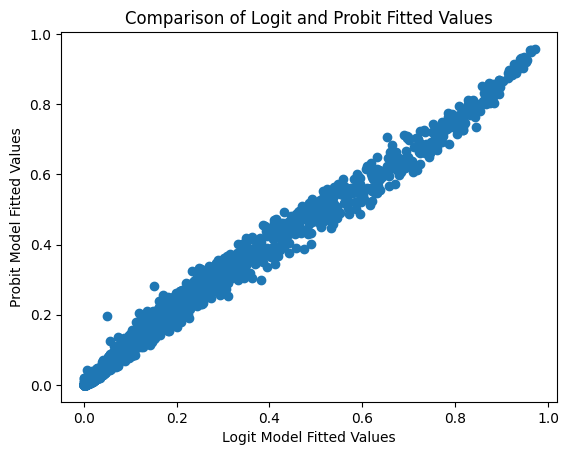

Correlation: 0.9945216959277705


In [775]:
plt.scatter(predictions_churn_logit2,
           predictions_churn_probit2)
plt.xlabel('Logit Model Fitted Values')
plt.ylabel('Probit Model Fitted Values')
plt.title('Comparison of Logit and Probit Fitted Values')
plt.show()

# compute the correlation
correlation = np.corrcoef(predictions_churn_logit2,
                          predictions_churn_probit2)[0, 1]
print('Correlation:', correlation)

In [781]:
# compare also the predictions converted into "0" and "1"
# with the cut-off level of 0.5

# convert predicted probs into binary labels (0 or 1)
logit_classification = np.where(predictions_churn_logit2 > 0.5, 1, 0)
probit_classification = np.where(predictions_churn_probit2 > 0.5, 1, 0)

# and create a contingency table
contingency_table = pd.crosstab(
    logit_classification,
    probit_classification,
    rownames = ['Logit Model'],
    colnames = ['Probit Model']
)

In [787]:
contingency_table

Probit Model,0,1
Logit Model,,
0,2703,10
1,34,292


# Multinomial logistic regression

#### ... ML 04 B